In [21]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

## **Preproceso**

Carga de los datos y visualización básica

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data();
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Visualización Basica

In [23]:
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
df_train = pd.DataFrame(x_train_flattened)
df_train['target'] = y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Reordenaremos las columnas de manera que la variable target sea la primera

In [24]:
cols = list(df_train.columns)
cols.remove('target')
cols.insert(0,'target')
df_train = df_train.reindex(columns=cols)
df_train.head()

,target,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
target,60000.0,4.500000,2.872305,0.0,2.0,4.5,7.0,9.0
0,60000.0,0.000800,0.092554,0.0,0.0,0.0,0.0,16.0
1,60000.0,0.005783,0.249033,0.0,0.0,0.0,0.0,36.0
2,60000.0,0.030083,0.767868,0.0,0.0,0.0,0.0,119.0
3,60000.0,0.103800,2.512017,0.0,0.0,0.0,0.0,164.0
...,...,...,...,...,...,...,...,...
779,60000.0,17.916900,45.173634,0.0,0.0,0.0,0.0,255.0
780,60000.0,8.485717,29.448614,0.0,0.0,0.0,0.0,255.0
781,60000.0,2.706333,17.258682,0.0,0.0,0.0,0.0,255.0
782,60000.0,0.819000,9.133252,0.0,0.0,0.0,0.0,255.0


In [26]:
df_train['target'].value_counts()

,count
target,
9,6000
0,6000
3,6000
2,6000
7,6000
5,6000
1,6000
6,6000
4,6000


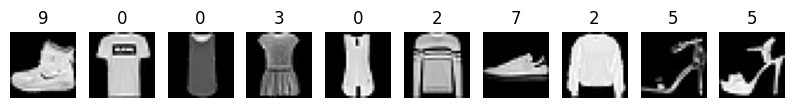

In [27]:
num_images = 10

plt.figure(figsize=(10, 2))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

plt.show()

In [28]:
classes = [0,2,6]
label_mapping = {0:0, 2:1, 6:2}

mask_train = np.isin(y_train, classes)
x_train_subset = x_train[mask_train]
y_train_subset = y_train[mask_train]
y_train_subset = np.vectorize(label_mapping.get)(y_train_subset)

mask_test = np.isin(y_test, classes)
x_test_subset = x_test[mask_test]
y_test_subset = y_test[mask_test]
y_test_subset = np.vectorize(label_mapping.get)(y_test_subset)

x_train_subset.shape, y_train_subset.shape, x_test_subset.shape, y_test_subset.shape

((18000, 28, 28), (18000,), (3000, 28, 28), (3000,))

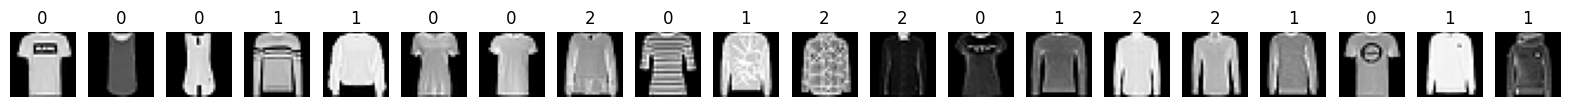

In [29]:
num_images = 20

plt.figure(figsize=(20, 4))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_train_subset[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train_subset[i])

plt.show()

In [30]:
x_train_subset = x_train_subset/255.0
x_test_subset = x_test_subset/255.0

## **Entrenar la CNN**

In [31]:
input = keras.Input(shape=(28,28))

### **Dos Capas Ocultas**


In [32]:
model = keras.layers.Flatten()(input)
model = keras.layers.Dense(100, activation='relu')(model)
model = keras.layers.Dense(50, activation='sigmoid')(model)
model = keras.layers.Dense(3, activation='softmax')(model)
nn = keras.Model(input, model)
nn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,703 (326.96 KB)

 Trainable params: 83,703 (326.96 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
nn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [34]:
history = nn.fit(x_train_subset, y_train_subset,
        epochs=30)

Epoch 1/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7165 - loss: 0.6370
Epoch 2/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8044 - loss: 0.4520
Epoch 3/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8310 - loss: 0.3858
Epoch 4/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8357 - loss: 0.3805
Epoch 5/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8410 - loss: 0.3662
Epoch 6/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8513 - loss: 0.3490
Epoch 7/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8523 - loss: 0.3379
Epoch 8/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8601 - loss: 0.3278
Epoch 9/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8699 - loss: 0.3099
Epoch 10/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8684 - loss: 0.3097
Epoch 11/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8682 - loss: 0.3076
Epoch 12/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [35]:
nn.evaluate(x_test_subset, y_test_subset)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8366 - loss: 0.4401


[0.4756079912185669, 0.8316666483879089]

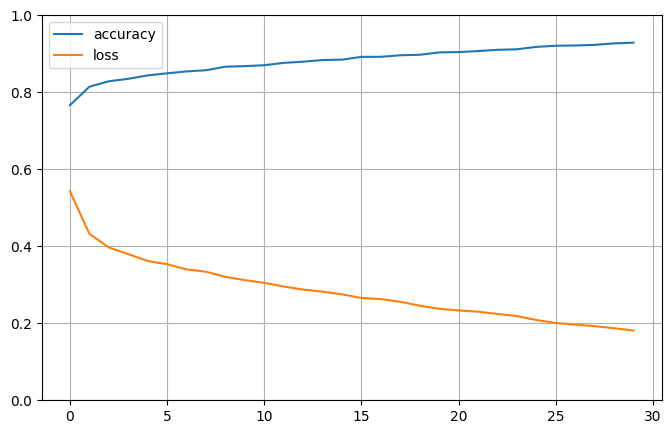

In [36]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
predict_y = nn.predict(x_test_subset)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
predict_class = np.argmax(predict_y, axis=1)

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test_subset, predict_class)

<Axes: >

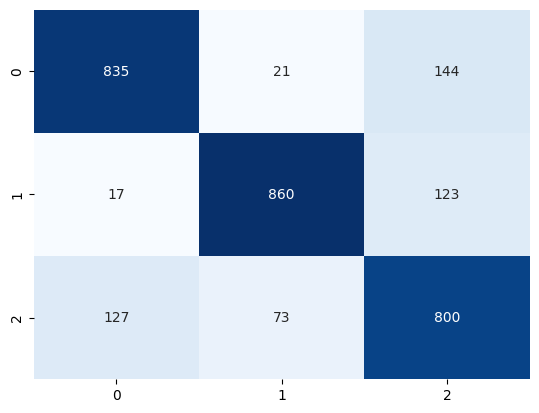

In [40]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

### **Cinco Capas Ocultas**

In [41]:
model2 = keras.layers.Flatten()(input)
model2 = keras.layers.Dense(200, activation='relu')(model2)
model2 = keras.layers.Dense(150, activation='sigmoid')(model2)
model2 = keras.layers.Dense(100, activation='relu')(model2)
model2 = keras.layers.Dense(50, activation='relu')(model2)
model2 = keras.layers.Dense(25, activation='sigmoid')(model2)
model2 = keras.layers.Dense(3, activation='softmax')(model2)
nn2 = keras.Model(input, model2)
nn2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,653 (815.05 KB)

 Trainable params: 208,653 (815.05 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
nn2.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [43]:
history2 = nn2.fit(x_train_subset, y_train_subset,
        epochs=30)

Epoch 1/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6355 - loss: 0.7657
Epoch 2/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8094 - loss: 0.4639
Epoch 3/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8222 - loss: 0.4141
Epoch 4/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8280 - loss: 0.3881
Epoch 5/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8399 - loss: 0.3705
Epoch 6/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8451 - loss: 0.3612
Epoch 7/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8456 - loss: 0.3583
Epoch 8/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8598 - loss: 0.3311
Epoch 9/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8537 - loss: 0.3347
Epoch 10/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8637 - loss: 0.3181
Epoch 11/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8694 - loss: 0.3147
Epoch 12/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step

In [44]:
nn2.evaluate(x_test_subset, y_test_subset)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8374 - loss: 0.4770


[0.5035573840141296, 0.8289999961853027]

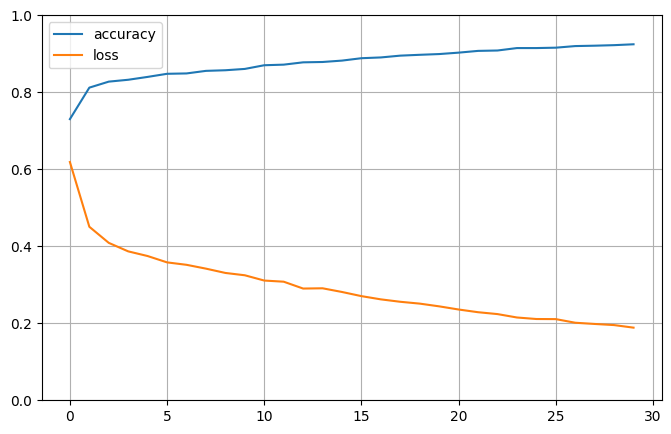

In [45]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
predict_y2 = nn2.predict(x_test_subset)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [47]:
predict_class2 = np.argmax(predict_y2, axis=1)

In [48]:
confusion_matrix2 = metrics.confusion_matrix(y_test_subset, predict_class2)

<Axes: >

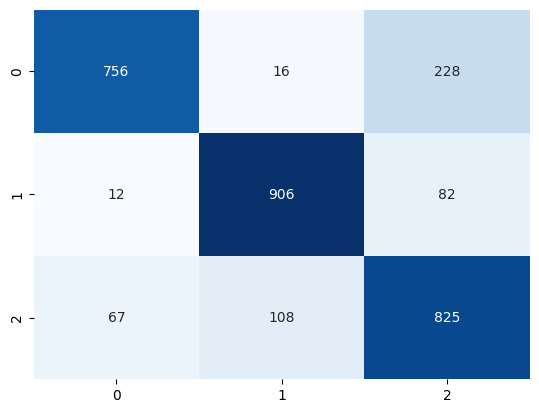

In [49]:
sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)